In [1]:
from keras.datasets import fashion_mnist

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

In [106]:
#Constant zone
COLOR = 'white'
FONT = 'Adobe'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.family'] = FONT

## Preprocessing and analyzing the data

In [3]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [4]:
print("Training data shape:",trainX.shape)
print("Training data label shape:",trainy.shape)
print("Testing data shape:",testX.shape)
print("Testing data label shape:",testy.shape)
print("Training data type:",trainX.dtype)
print("Training data label type:",trainy.dtype)
print("Testing data type:",testX.dtype)
print("Testing data label type:",testy.dtype)

Training data shape: (60000, 28, 28)
Training data label shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing data label shape: (10000,)


In [6]:
trainy

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
print("Amount of samples:",len(trainX[:]))

Amount of samples: 60000


In [8]:
#plots an image given index
def plot_image(index, train_data, shape = 28):
    plt.imshow(trainX[index].reshape(shape, shape),cmap = plt.get_cmap('gray'), interpolation = 'nearest')
    print("Label:",trainy[index])

Label: 2


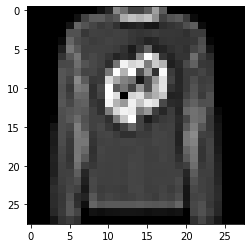

In [9]:
plot_image(123, trainX)

In [10]:
sampleDF = pd.DataFrame(data = trainX.reshape(60000,28*28))
sampleDF

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [11]:
labelDF = pd.DataFrame(data = trainy, columns = ["Label"])
labelDF

,Label
0,9
1,0
2,0
3,3
4,0
...,...
59995,5
59996,1
59997,3
59998,0


In [12]:
print("Sample DataFrame data types\n",sampleDF.dtypes)

Sample DataFrame data types
 0      uint8
1      uint8
2      uint8
3      uint8
4      uint8
       ...  
779    uint8
780    uint8
781    uint8
782    uint8
783    uint8
Length: 784, dtype: object


In [13]:
print("Label DataFrame data types\n",sampleDF.dtypes)
print(labelDF.dtypes)

Label DataFrame data types
 0      uint8
1      uint8
2      uint8
3      uint8
4      uint8
       ...  
779    uint8
780    uint8
781    uint8
782    uint8
783    uint8
Length: 784, dtype: object
Label    uint8
dtype: object


In [14]:
#Concatenate the 2 dataframes into one dataframe we will work with
data = pd.concat([sampleDF, labelDF], axis = 1)
data

## Label information
    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot

In [16]:
data["Label"].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: Label, dtype: int64

## Models

## KNN

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [19]:
X = data.drop("Label", axis = 1).values
y = data['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [20]:
KNN_model = KNeighborsClassifier(weights = 'distance',n_neighbors = 4, n_jobs = os.cpu_count() - 1).fit(X_train, y_train)

KNN_score(train): 1.0
KNN_score(test): 0.859


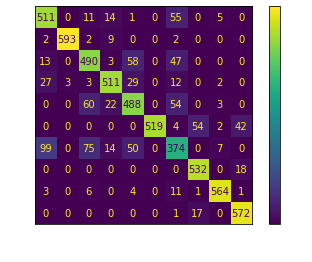

In [258]:
print("KNN_score(train):",KNN_model.score(X_train, y_train))
print("KNN_score(test):",KNN_model.score(X_test, y_test))
confusion_matrix = ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test)

In [78]:
cv_model_KNN = cross_validate(KNN_model, X_train, y_train, cv = 3,scoring = 'accuracy', verbose = 3, return_train_score=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=1.000, test=0.856) total time=  49.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.854) total time=  49.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.9min remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.846) total time=  50.8s
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.4min finished


In [83]:
print("Cross validation training scores:",cv_model_KNN['train_score'])
print("Cross validation test scores:",cv_model_KNN['test_score'])

Cross validation training scores: [1. 1. 1.]


## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced').fit(X_train, y_train)

In [222]:
print("Decision tree model score(train):",decision_tree_model.score(X_train, y_train))
print("Decision tree model score(test):",decision_tree_model.score(X_test, y_test))
confusion_matrix = ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_test, y_test)

Decision tree model score(train): 1.0


In [34]:
#Cross-validating five times(Any more then that is too slow)
#print("cv_scores mean:",cross_val_score(decision_tree_model, X_train, y_train, cv=5)

## Ada-boost

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
ada_boost_model = AdaBoostClassifier(algorithm = 'SAMME.R',learning_rate = 0.8,random_state = 42).fit(X_train, y_train)

In [227]:
print("ADA-boost score(train):",ada_boost_model.score(X_train, y_train))
print("ADA-boost score(test):",ada_boost_model.score(X_test, y_test))
confusion_matrix = ConfusionMatrixDisplay.from_estimator(ada_boost_model, X_test, y_test)

ADA-boost score(train): 0.5797222222222222


## Applying grid search on the  models to tune hyper-parameters

In [46]:
from sklearn.model_selection import GridSearchCV

In [252]:
def plot_grid_results(model_checked,grid_data, grid_model): #Plots grid-search score results from best to worst
    params = []
    for param in grid_model.best_params_:
        params.append("param_"+param)
    params.append('mean_test_score')
    
    KNN_grid_frame_mod = grid_data.loc[:,params]
    KNN_grid_frame_mod = KNN_grid_frame_mod.fillna(value = "None")
    #KNN_grid_frame_mod.loc[KNN_grid_frame_mod[params[0]] == np.nan, params[:-1]] = "None"
#     KNN_grid_frame_mod['total_mean_time'] = KNN_grid_frame_mod['mean_fit_time'] + KNN_grid_frame_mod['mean_score_time']
#     KNN_grid_frame_mod.drop(columns = ['mean_fit_time', 'mean_score_time'], inplace = True)
    grp = KNN_grid_frame_mod.groupby(by = params[:-1]).agg(lambda x: x).mean_test_score.nlargest(n = grid_data.shape[0])
    min_value = grid_data['mean_test_score'].min()
    max_value = grid_data['mean_test_score'].max()
    
    plt.figure(facecolor='black') 
    grp.plot(kind = "bar", figsize = (24, 8), fontsize = 16, color = "Green")
    ax = plt.axes()
    ax.set_facecolor("black")
    plt.title("Gridsearch results sorted from highest to lowest({0})".format(model_checked), fontsize = 16)
    ax.set_ylim([(min_value - 0.001) ,max_value])
    plt.show()
    msg = "Best {0} model: {1} with an accuracy of {2}".format(model_checked, grid_model.best_params_, grid_model.best_score_)
    print(msg)

## KNN

In [49]:
"""
KNN grid-search
"""

# KNN = KNeighborsClassifier(n_jobs = os.cpu_count() - 1)
# parameters = {'n_neighbors' : range(1,6), 'weights' : ['uniform', 'distance']}
# KNN_grid = GridSearchCV(KNN, parameters, cv = 3 ,verbose = 4).fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ....n_neighbors=1, weights=uniform;, score=0.848 total time=  48.5s
[CV 2/3] END ....n_neighbors=1, weights=uniform;, score=0.844 total time=  48.1s
[CV 3/3] END ....n_neighbors=1, weights=uniform;, score=0.840 total time=  45.1s
[CV 1/3] END ...n_neighbors=1, weights=distance;, score=0.848 total time=  43.9s
[CV 2/3] END ...n_neighbors=1, weights=distance;, score=0.844 total time=  49.9s
[CV 3/3] END ...n_neighbors=1, weights=distance;, score=0.840 total time=  47.4s
[CV 1/3] END ....n_neighbors=2, weights=uniform;, score=0.846 total time=  44.3s
[CV 2/3] END ....n_neighbors=2, weights=uniform;, score=0.842 total time=  43.0s
[CV 3/3] END ....n_neighbors=2, weights=uniform;, score=0.836 total time=  43.3s
[CV 1/3] END ...n_neighbors=2, weights=distance;, score=0.848 total time=  44.3s
[CV 2/3] END ...n_neighbors=2, weights=distance;, score=0.844 total time=  42.5s
[CV 3/3] END ...n_neighbors=2, weights=distance;

In [167]:
KNN_grid_frame = pd.DataFrame(KNN_grid.cv_results_)
KNN_grid_frame

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019877,0.000176,47.292171,1.512584,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.848056,0.844222,0.839500,0.843926,0.003499,8
1,0.018148,0.000887,47.180584,2.461344,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.848056,0.844222,0.839500,0.843926,0.003499,8
2,0.018339,0.001312,43.628143,0.533321,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.846111,0.842278,0.836167,0.841519,0.004095,10
3,0.021685,0.002063,43.446261,0.722014,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.848056,0.844278,0.839500,0.843944,0.003501,7
4,0.022642,0.007340,53.804528,6.116041,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.850111,0.847167,0.842000,0.846426,0.003353,6
5,0.023471,0.006610,49.988846,2.867763,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.852556,0.849667,0.844611,0.848944,0.003283,5
6,0.020001,0.001633,49.820968,0.609839,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.853222,0.852556,0.847056,0.850944,0.002763,3
7,0.018283,0.000398,48.333994,0.794994,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.855778,0.854389,0.845500,0.851889,0.004553,1
8,0.018948,0.000872,49.185637,1.216538,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.853167,0.850667,0.846611,0.850148,0.002701,4
9,0.021566,0.002765,48.644379,0.844415,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.854944,0.852889,0.847778,0.851870,0.003013,2


<ipython-input-252-0021ad43d24d>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


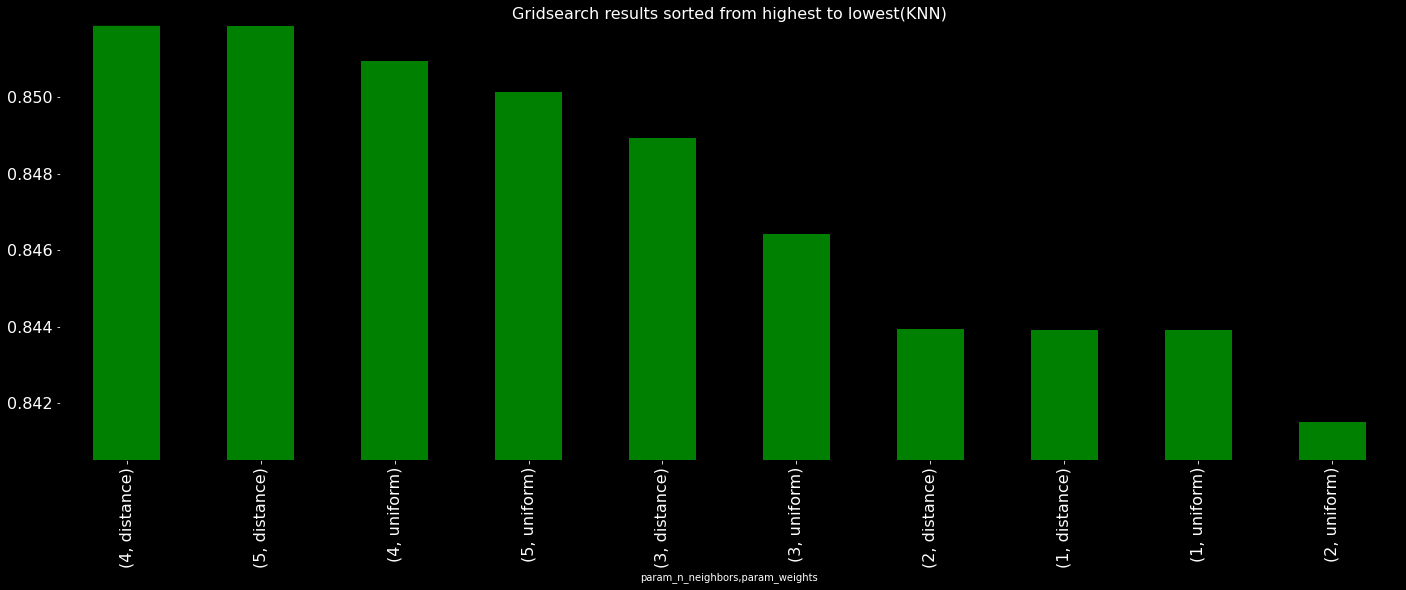

Best KNN model: {'n_neighbors': 4, 'weights': 'distance'} with an accuracy of 0.8518888888888889


In [253]:
plot_grid_results("KNN", grid_data = KNN_grid_frame, grid_model = KNN_grid)

## Decision tree

In [182]:
"""
DTree grid-search
"""
# DTree_model = DecisionTreeClassifier(random_state = 42)
# parameters = {'criterion': ['gini', 'entropy'], 'class_weight' : [None, 'balanced']}
# DTree_grid = GridSearchCV(DTree_model, parameters, cv = 3 ,verbose = 4).fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .class_weight=None, criterion=gini;, score=0.793 total time=  25.1s
[CV 2/3] END .class_weight=None, criterion=gini;, score=0.790 total time=  25.9s
[CV 3/3] END .class_weight=None, criterion=gini;, score=0.789 total time=  24.5s
[CV 1/3] END class_weight=None, criterion=entropy;, score=0.803 total time=  24.1s
[CV 2/3] END class_weight=None, criterion=entropy;, score=0.805 total time=  24.2s
[CV 3/3] END class_weight=None, criterion=entropy;, score=0.800 total time=  24.2s
[CV 1/3] END class_weight=balanced, criterion=gini;, score=0.794 total time=  27.8s
[CV 2/3] END class_weight=balanced, criterion=gini;, score=0.790 total time=  27.5s
[CV 3/3] END class_weight=balanced, criterion=gini;, score=0.787 total time=  27.7s
[CV 1/3] END class_weight=balanced, criterion=entropy;, score=0.805 total time=  26.2s
[CV 2/3] END class_weight=balanced, criterion=entropy;, score=0.802 total time=  24.8s
[CV 3/3] END class_wei

In [200]:
DTree_grid_frame = pd.DataFrame(DTree_grid.cv_results_)
DTree_grid_frame

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,25.211865,0.574074,0.041924,0.000423,None,gini,"{'class_weight': None, 'criterion': 'gini'}",0.793111,0.789889,0.788833,0.790611,0.001820,3
1,24.231057,0.044498,0.041615,0.001715,None,entropy,"{'class_weight': None, 'criterion': 'entropy'}",0.803444,0.805444,0.800111,0.803000,0.002200,1
2,27.700419,0.128370,0.045839,0.004744,balanced,gini,"{'class_weight': 'balanced', 'criterion': 'gini'}",0.793667,0.789556,0.787222,0.790148,0.002664,4
3,25.161904,0.832136,0.042150,0.002044,balanced,entropy,"{'class_weight': 'balanced', 'criterion': 'ent...",0.804944,0.802278,0.799778,0.802333,0.002110,2


<ipython-input-252-0021ad43d24d>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


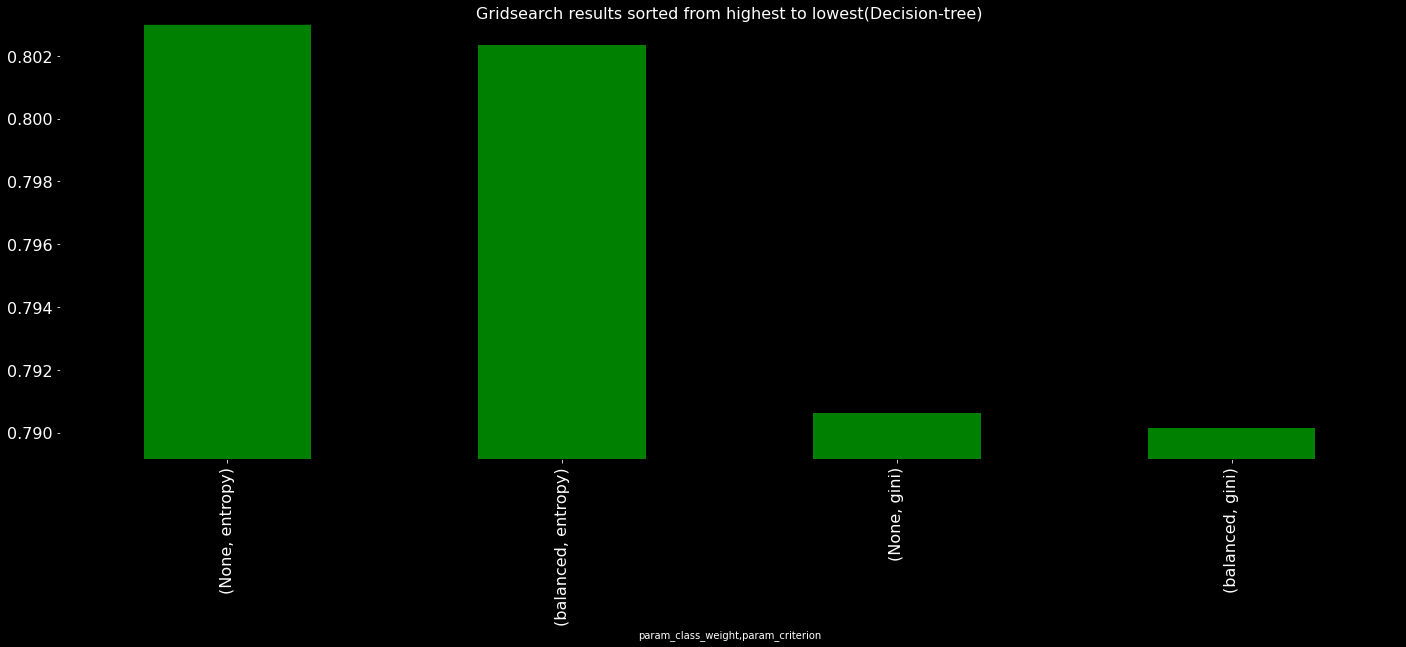

Best Decision-tree model: {'class_weight': None, 'criterion': 'entropy'} with an accuracy of 0.8029999999999999


In [254]:
plot_grid_results("Decision-tree", grid_data = DTree_grid_frame, grid_model = DTree_grid)

## Ada-boost

In [255]:
"""
Ada-boost grid-search
"""

# ADA_model = AdaBoostClassifier(random_state = 42)
# parameters = {'learning_rate' : [0.2,0.4,0.6,0.8,1], 'algorithm' : ['SAMME', 'SAMME.R']}
# ADA_grid = GridSearchCV(ADA_model, parameters, cv = 3 ,verbose = 4).fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END algorithm=SAMME, learning_rate=0.2;, score=0.336 total time= 1.3min
[CV 2/3] END algorithm=SAMME, learning_rate=0.2;, score=0.418 total time= 1.3min
[CV 3/3] END algorithm=SAMME, learning_rate=0.2;, score=0.360 total time= 1.2min
[CV 1/3] END algorithm=SAMME, learning_rate=0.4;, score=0.349 total time= 1.2min
[CV 2/3] END algorithm=SAMME, learning_rate=0.4;, score=0.435 total time= 1.2min
[CV 3/3] END algorithm=SAMME, learning_rate=0.4;, score=0.358 total time= 1.3min
[CV 1/3] END algorithm=SAMME, learning_rate=0.6;, score=0.435 total time= 1.3min
[CV 2/3] END algorithm=SAMME, learning_rate=0.6;, score=0.468 total time= 1.3min
[CV 3/3] END algorithm=SAMME, learning_rate=0.6;, score=0.433 total time= 1.7min
[CV 1/3] END algorithm=SAMME, learning_rate=0.8;, score=0.433 total time= 2.1min
[CV 2/3] END algorithm=SAMME, learning_rate=0.8;, score=0.452 total time= 1.9min
[CV 3/3] END algorithm=SAMME, learning_rate=0.8;

In [256]:
ADA_grid_frame = pd.DataFrame(ADA_grid.cv_results_)
ADA_grid_frame

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,73.539399,2.080745,2.318410,0.082864,SAMME,0.2,"{'algorithm': 'SAMME', 'learning_rate': 0.2}",0.335944,0.417611,0.360111,0.371222,0.034254,10
1,73.290183,1.863110,2.089718,0.053401,SAMME,0.4,"{'algorithm': 'SAMME', 'learning_rate': 0.4}",0.348944,0.435111,0.357833,0.380630,0.038695,9
2,83.381807,11.981020,2.657237,0.761822,SAMME,0.6,"{'algorithm': 'SAMME', 'learning_rate': 0.6}",0.434833,0.467778,0.432833,0.445148,0.016022,8
3,114.740146,6.331847,3.048961,0.085427,SAMME,0.8,"{'algorithm': 'SAMME', 'learning_rate': 0.8}",0.432667,0.452056,0.520556,0.468426,0.037702,6
4,106.102770,2.750387,2.886651,0.080506,SAMME,1,"{'algorithm': 'SAMME', 'learning_rate': 1}",0.505611,0.386000,0.450556,0.447389,0.048882,7
5,105.927896,5.614227,3.199108,0.066224,SAMME.R,0.2,"{'algorithm': 'SAMME.R', 'learning_rate': 0.2}",0.549667,0.532278,0.532889,0.538278,0.008057,4
6,102.889835,4.430137,3.164227,0.015798,SAMME.R,0.4,"{'algorithm': 'SAMME.R', 'learning_rate': 0.4}",0.532111,0.578667,0.586889,0.565889,0.024119,2
7,105.244789,3.058490,3.321320,0.151606,SAMME.R,0.6,"{'algorithm': 'SAMME.R', 'learning_rate': 0.6}",0.480889,0.585667,0.569889,0.545481,0.046126,3
8,104.077906,6.590998,3.102113,0.530978,SAMME.R,0.8,"{'algorithm': 'SAMME.R', 'learning_rate': 0.8}",0.598389,0.549944,0.583889,0.577407,0.020301,1
9,74.320442,1.722641,2.293600,0.136264,SAMME.R,1,"{'algorithm': 'SAMME.R', 'learning_rate': 1}",0.507333,0.433389,0.504444,0.481722,0.034197,5


<ipython-input-252-0021ad43d24d>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


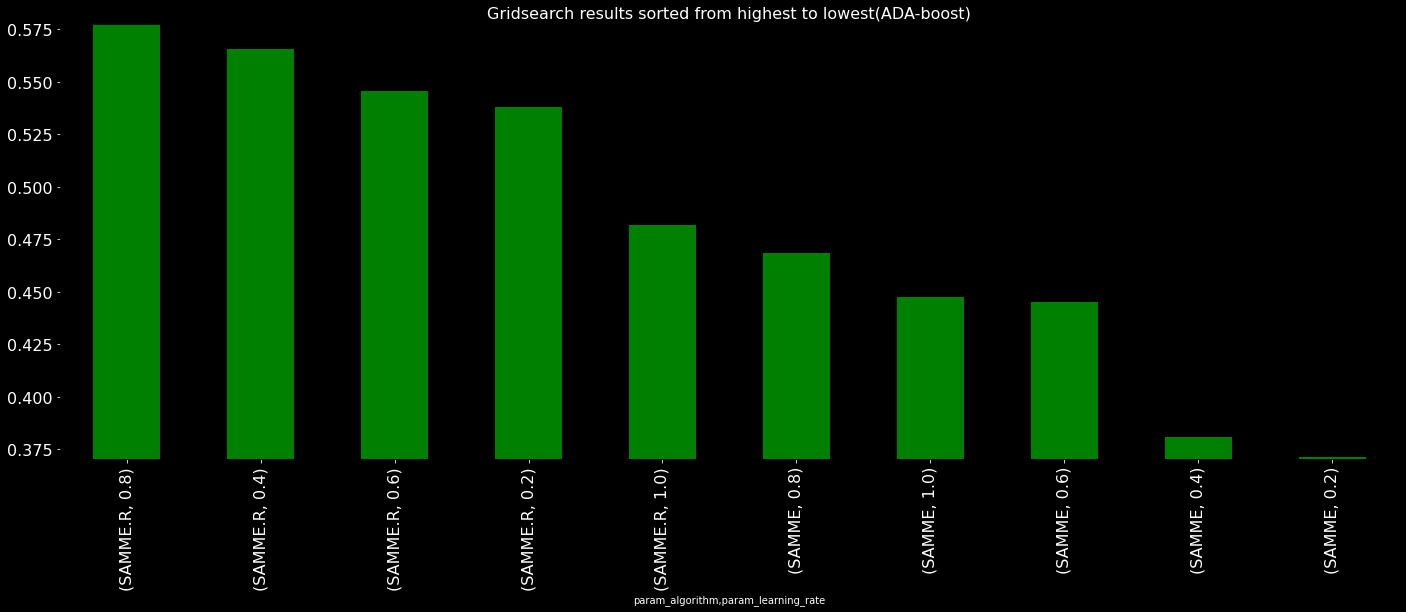

Best ADA-boost model: {'algorithm': 'SAMME.R', 'learning_rate': 0.8} with an accuracy of 0.5774074074074075


In [257]:
plot_grid_results("ADA-boost", grid_data = ADA_grid_frame, grid_model = ADA_grid)

In [87]:
# print("Best Ada-boost estimator:", ADA_grid.best_estimator_,"with a score of:",ADA_grid.best_score_)

Best Ada-boost estimator: AdaBoostClassifier(learning_rate=0.8, random_state=42) with a score of: 0.5774074074074075


## Pixel Importance using RandomForestClassifier

Random forest score: 0.8843333333333333


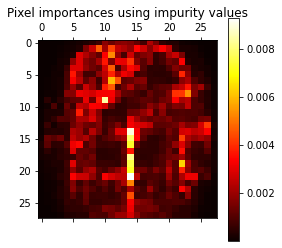

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = os.cpu_count() - 1)
forest.fit(X_train, y_train)

print("Random forest score:",forest.score(X_test, y_test))
#cv_scores = cross_val_score(forest, X_train, y_train, cv=5)
#print(cv_scores)
#print("cv_scores mean: " + str(np.mean(cv_scores)))
    
importances = forest.feature_importances_
imp_reshaped = importances.reshape((28, 28))
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

In [39]:
features = pd.Series(forest.feature_importances_, index=range(784))
top_features = features.sort_values(ascending=False).head(600)
print(top_features)
top_features = top_features.index.values.tolist()

602    0.009314
406    0.009002
262    0.008466
518    0.008224
434    0.007911
         ...   
591    0.000444
486    0.000444
485    0.000443
732    0.000443
696    0.000441
Length: 600, dtype: float64


In [44]:
#Create a new dataframe where samples have the 600 most important pixels
top_data = data.iloc[:, top_features]
top_data = pd.concat([top_data, labelDF], axis = 1)
X_top_data = top_data.drop(['Label'], axis = 1).values
y_top_data = top_data['Label'].values
X_top_data_train, X_top_data_test, y_top_data_train, y_top_data_test = train_test_split(X_top_data, y_top_data, test_size = 0.15, random_state = 42)

In [49]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_top_data_train, y_top_data_train)
print("Random forest score after cropping out not important pixels:",forest.score(X_top_data_test, y_top_data_test))
#cv_scores = cross_val_score(forest, X_top_data_train, y_top_data_train, cv=5)
#print(cv_scores)
#print("cv_scores mean: " + str(np.mean(cv_scores)))

Random forest score after cropping out not important pixels: 0.879


In [ ]:
#plot_image(123,X_top_data,shape = int(601**0.5))

In [ ]:
unique, counts = np.unique(y_top_data_test, return_counts=True)
dict(zip(unique, counts))

## Using new datafame on previous models

## *KNN-improved data*

In [ ]:
KNN_model.fit(X_top_data_train, y_top_data_train)

In [ ]:
print("Improved data KNN score:",KNN_model.score(X_top_data_test, y_top_data_test))

## *Decision tree-improved data*

In [ ]:
decision_tree_model.fit(X_top_data_train, y_top_data_train)

In [ ]:
print("Improved data decision tree model score:",decision_tree_model.score(X_top_data_test, y_top_data_test))

In [ ]:
confusion_matrix = ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_top_data_test, y_top_data_test)